In [1]:
import IPython.display as ipd
import pandas as pd
import numpy as np
import os

import numpy as np
import pandas as pd

import librosa
import librosa.display
import soundfile as sf # librosa fails when reading files on Kaggle.

import matplotlib.pyplot as plt
import IPython.display as ipd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


In [2]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [68]:
%pylab inline
import os
import pandas as pd
import librosa
import glob 

Populating the interactive namespace from numpy and matplotlib


/Users/amitpatel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['axes', 'plot', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [69]:
data, sampling_rate = librosa.load('/Users/amitpatel/Downloads/download.wav')

Populating the interactive namespace from numpy and matplotlib


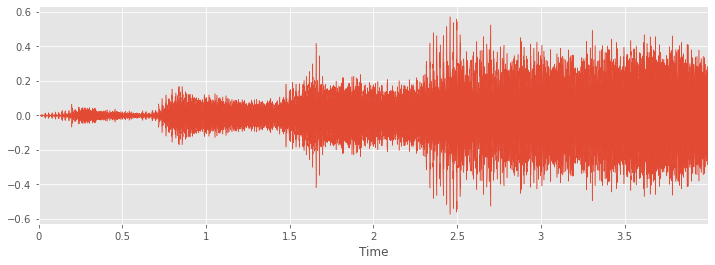

In [70]:
%pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [71]:
train=librosa.load('/Users/amitpatel/Downloads/download.wav')

In [72]:
import numpy as np
np.random.seed(1001)

import os
import shutil

import IPython
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
import sklearn as sklearn

%matplotlib inline
matplotlib.style.use('ggplot')

In [73]:


from sklearn.model_selection import train_test_split

In [74]:
from sklearn.model_selection import KFold

In [75]:
train = pd.read_csv("/Users/amitpatel/Downloads/train.csv")
test = pd.read_csv("/Users/amitpatel/Downloads/test.csv")


In [76]:
test.head()

site                                      row_id  seconds  \
0  site_1   site_1_0a997dff022e3ad9744d4e7bbf923288_5        5   
1  site_1  site_1_0a997dff022e3ad9744d4e7bbf923288_10       10   
2  site_1  site_1_0a997dff022e3ad9744d4e7bbf923288_15       15   

                           audio_id  
0  0a997dff022e3ad9744d4e7bbf923288  
1  0a997dff022e3ad9744d4e7bbf923288  
2  0a997dff022e3ad9744d4e7bbf923288

In [77]:
test.columns

Index(['site', 'row_id', 'seconds', 'audio_id'], dtype='object')

In [78]:
train.head()

rating playback_used ebird_code    channels        date          pitch  \
0     3.5            no     aldfly    1 (mono)  2013-05-25  Not specified   
1     4.0            no     aldfly  2 (stereo)  2013-05-27           both   
2     4.0            no     aldfly  2 (stereo)  2013-05-27           both   
3     3.5            no     aldfly  2 (stereo)  2013-05-27           both   
4     4.0            no     aldfly  2 (stereo)  2013-05-27           both   

   duration      filename          speed           species  ...   xc_id  \
0        25  XC134874.mp3  Not specified  Alder Flycatcher  ...  134874   
1        36  XC135454.mp3           both  Alder Flycatcher  ...  135454   
2        39  XC135455.mp3           both  Alder Flycatcher  ...  135455   
3        33  XC135456.mp3           both  Alder Flycatcher  ...  135456   
4        36  XC135457.mp3          level  Alder Flycatcher  ...  135457   

                                 url        country            author  \
0  https://www.xeno-canto.org/134874  United States  Jonathon Jongsma   
1  https://www.xeno-canto.org/135454  United States       Mike Nelson   
2  https://www.xeno-canto.org/135455  United States       Mike Nelson   
3  https://www.xeno-canto.org/135456  United States       Mike Nelson   
4  https://www.xeno-canto.org/135457  United States       Mike Nelson   

                        primary_label longitude         length   time  \
0  Empidonax alnorum_Alder Flycatcher   -92.962  Not specified   8:00   
1  Empidonax alnorum_Alder Flycatcher  -82.1106         0-3(s)  08:30   
2  Empidonax alnorum_Alder Flycatcher  -82.1106         0-3(s)  08:30   
3  Empidonax alnorum_Alder Flycatcher  -82.1106         0-3(s)  08:30   
4  Empidonax alnorum_Alder Flycatcher  -82.1106         0-3(s)  08:30   

          recordist                                            license  
0  Jonathon Jongsma        Creative Commons Attribution-ShareAlike 3.0  
1       Mike Nelson  Creative Commons Attribution-NonCommercial-Sha...  
2       Mike Nelson  Creative Commons Attribution-NonCommercial-Sha...  
3       Mike Nelson  Creative Commons Attribution-NonCommercial-Sha...  
4       Mike Nelson  Creative Commons Attribution-NonCommercial-Sha...  

[5 rows x 35 columns]

In [79]:
train.columns

Index(['rating', 'playback_used', 'ebird_code', 'channels', 'date', 'pitch',
       'duration', 'filename', 'speed', 'species', 'number_of_notes', 'title',
       'secondary_labels', 'bird_seen', 'sci_name', 'location', 'latitude',
       'sampling_rate', 'type', 'elevation', 'description', 'bitrate_of_mp3',
       'file_type', 'volume', 'background', 'xc_id', 'url', 'country',
       'author', 'primary_label', 'longitude', 'length', 'time', 'recordist',
       'license'],
      dtype='object')

In [80]:
print("Number of training examples=", train.shape[0], "  Number of classes=", len(train.primary_label.unique()))

Number of training examples= 21375   Number of classes= 264


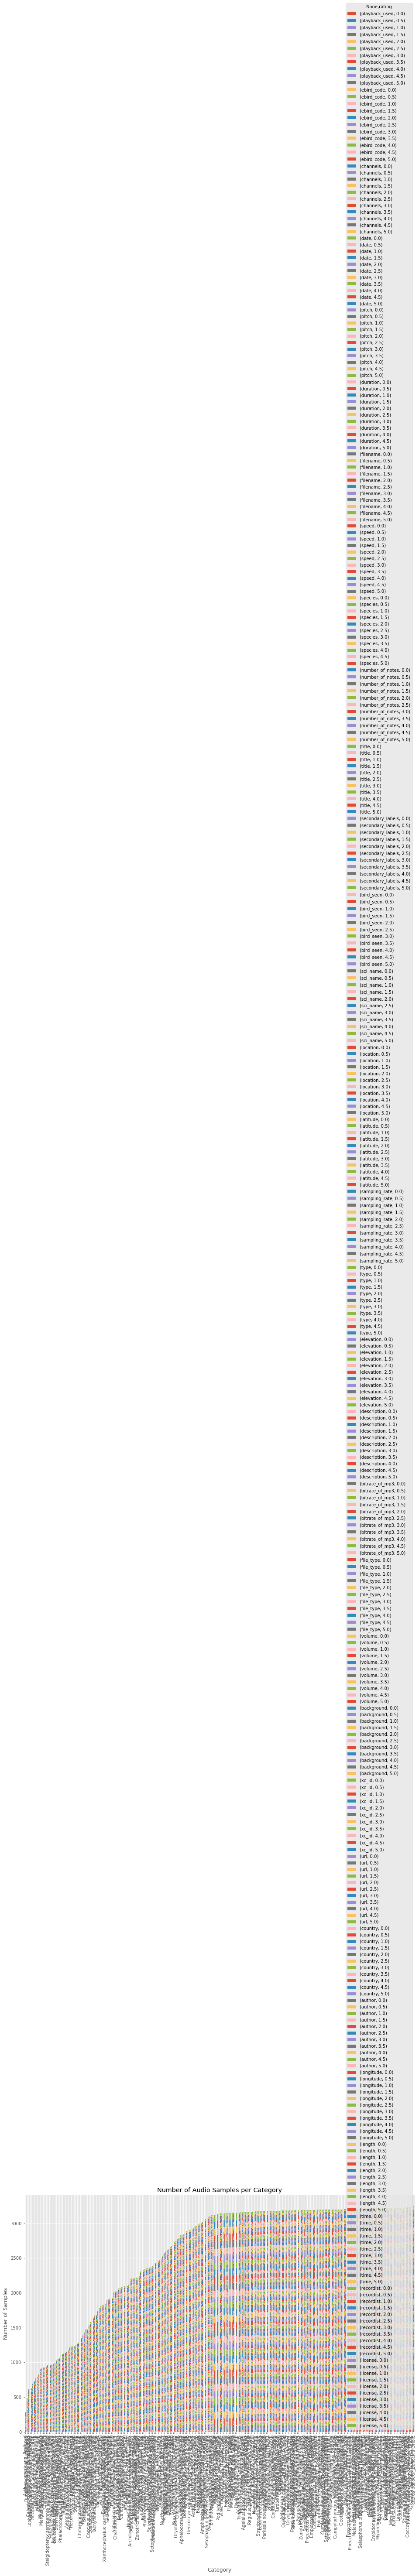

In [81]:
category_group = train.groupby(['primary_label', 'rating']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,10))
plot.set_xlabel("Category")
plot.set_ylabel("Number of Samples");

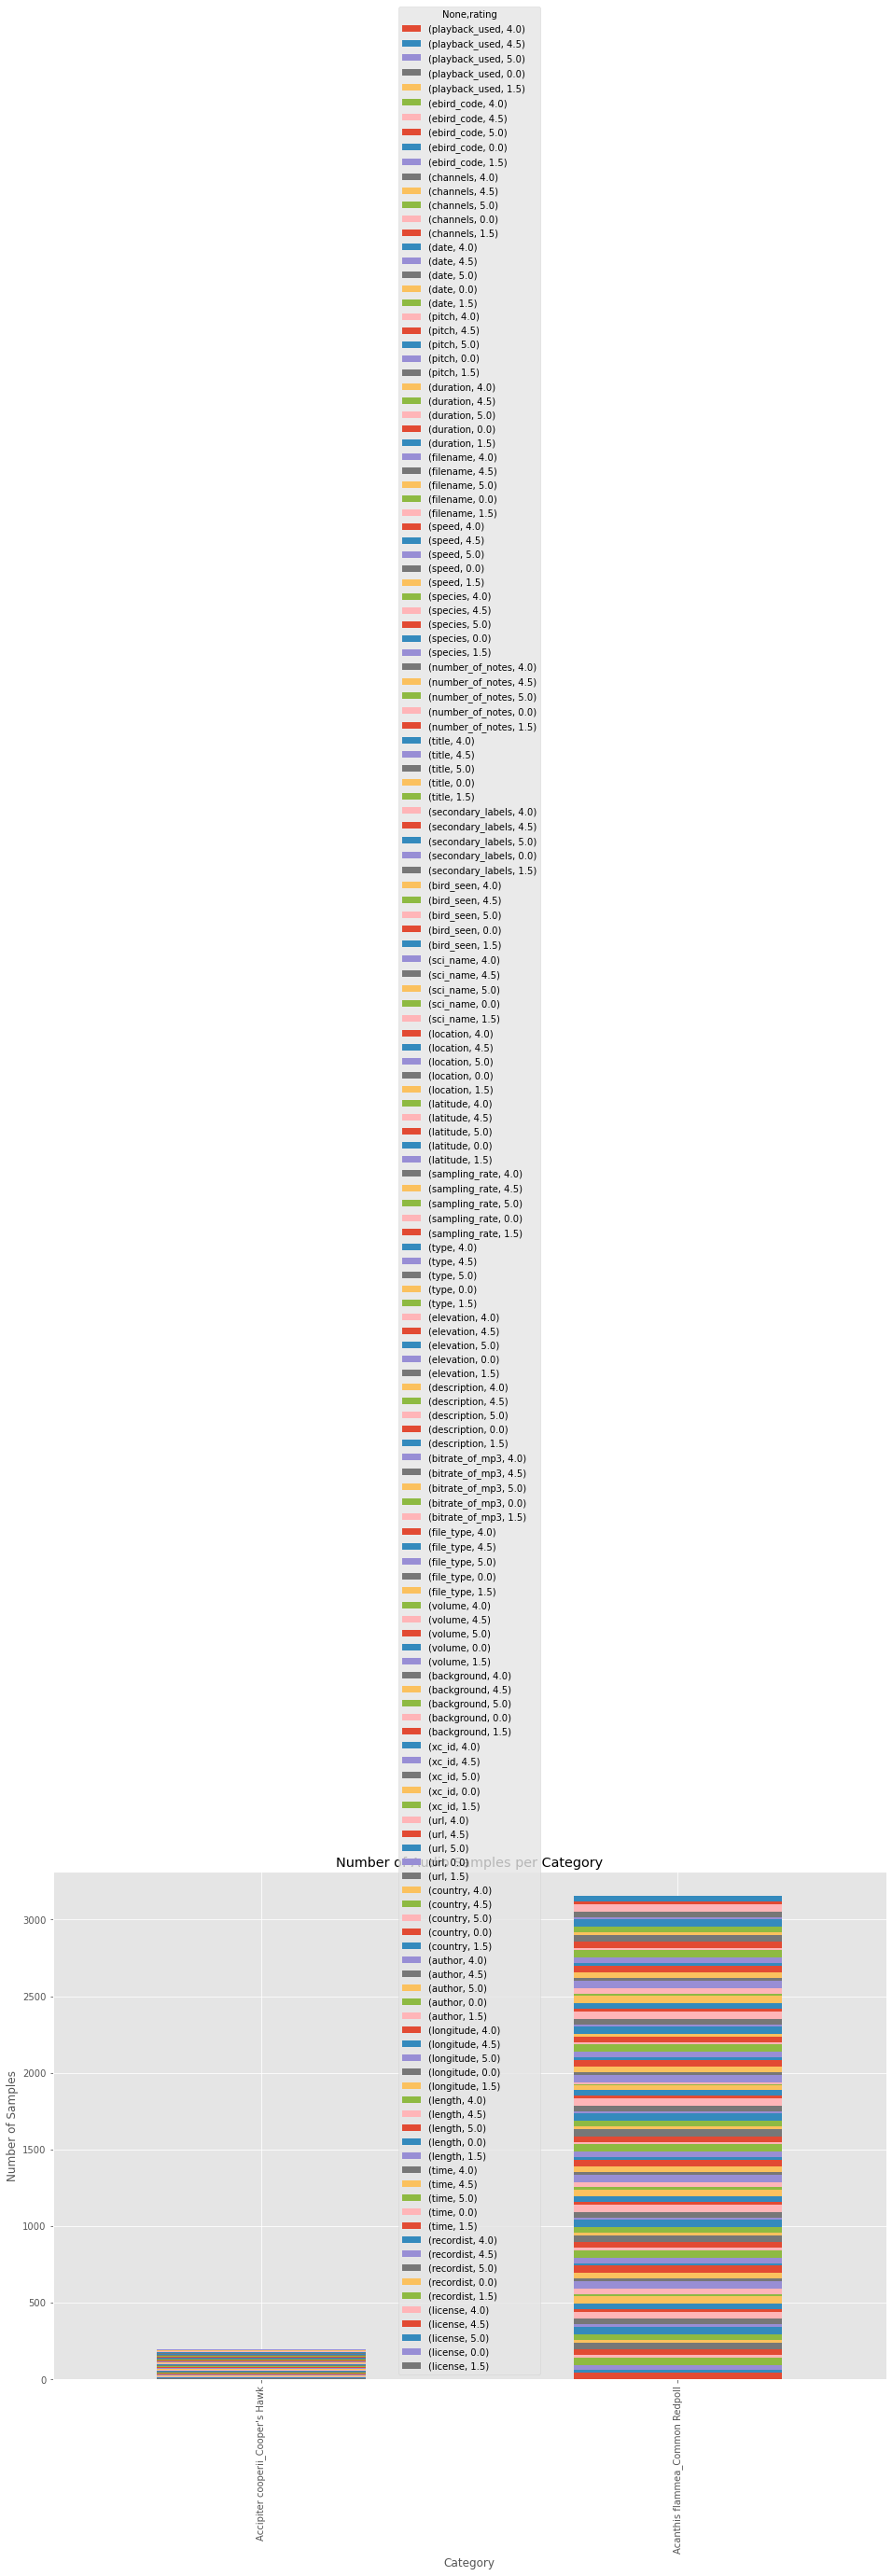

In [82]:
category_group = train.groupby(['primary_label', 'rating']).count().head()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,10))
plot.set_xlabel("Category")
plot.set_ylabel("Number of Samples");

In [83]:
print('Minimum samples per category = ', min(train.primary_label.value_counts()))
print('Maximum samples per category = ', max(train.primary_label.value_counts()))

Minimum samples per category =  9
Maximum samples per category =  100


Let's now analyze the frame length distribution in Train and Test

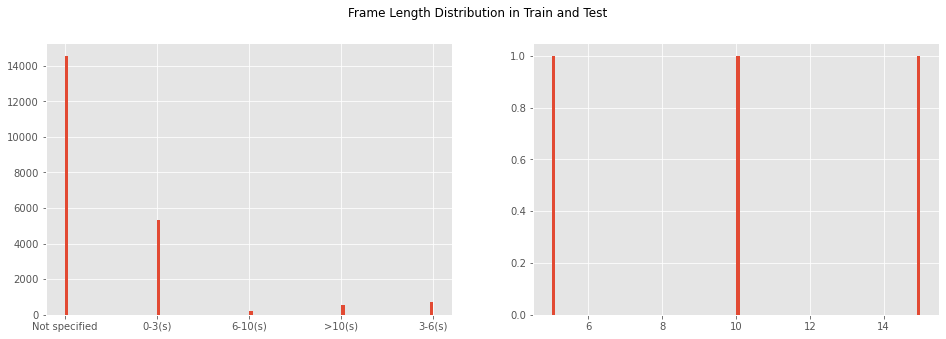

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
train.length.hist(bins=100, ax=axes[0])
test.seconds.hist(bins=100, ax=axes[1])
plt.suptitle('Frame Length Distribution in Train and Test', ha='center', fontsize='large');

In [ ]:
sns.heatmap(train.isnull(), cbar=False)

In [85]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [86]:
from pandas_profiling import ProfileReport

In [87]:
profile= ProfileReport(train)

In [88]:
profile